#### A) State a Classification business question:
##### Whether loan will be approved or not for a given details about a customer?
#### B) Introduce your data set related to this question and summarize your data set.
##### The dataset contains records about customers, and it has a target column if loan is approved or not.
##### The data set has features(columns),
##### Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount
##### Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
#### C) Use K-nearest-neighbor method for analysis, and explain which K value is the best for your data set.
##### K nearest neighbor classification algorithm is used to find the best K value for accuracy. Here for this dataset, we get a K value of 9, where the accuracy is 0.796875. Using this K value we are finding if the loan will be approved or not for the new data. And our prediction shows that loan will be approved.


## Import required packages

In [19]:
%matplotlib inline

from pathlib import Path
import pandas as pd
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.neighbors import NearestNeighbors, KNeighborsClassifier
import matplotlib.pylab as plt
import seaborn as sns

### Reading Data

In [20]:
data = pd.read_csv('loan approval.csv')

In [21]:
data

Loan_ID  Gender Married Dependents     Education Self_Employed  \
0    LP001002    Male      No          0      Graduate            No   
1    LP001003    Male     Yes          1      Graduate            No   
2    LP001005    Male     Yes          0      Graduate           Yes   
3    LP001006    Male     Yes          0  Not Graduate            No   
4    LP001008    Male      No          0      Graduate            No   
..        ...     ...     ...        ...           ...           ...   
609  LP002978  Female      No          0      Graduate            No   
610  LP002979    Male     Yes         3+      Graduate            No   
611  LP002983    Male     Yes          1      Graduate            No   
612  LP002984    Male     Yes          2      Graduate            No   
613  LP002990  Female      No          0      Graduate           Yes   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0               5849                0.0         NaN             360.0   
1               4583             1508.0       128.0             360.0   
2               3000                0.0        66.0             360.0   
3               2583             2358.0       120.0             360.0   
4               6000                0.0       141.0             360.0   
..               ...                ...         ...               ...   
609             2900                0.0        71.0             360.0   
610             4106                0.0        40.0             180.0   
611             8072              240.0       253.0             360.0   
612             7583                0.0       187.0             360.0   
613             4583                0.0       133.0             360.0   

     Credit_History Property_Area Loan_Status  
0               1.0         Urban           Y  
1               1.0         Rural           N  
2               1.0         Urban           Y  
3               1.0         Urban           Y  
4               1.0         Urban           Y  
..              ...           ...         ...  
609             1.0         Rural           Y  
610             1.0         Rural           Y  
611             1.0         Urban           Y  
612             1.0         Urban           Y  
613             0.0     Semiurban           N  

[614 rows x 13 columns]

### checking for null values

In [22]:
data.isnull().any()

Loan_ID              False
Gender                True
Married               True
Dependents            True
Education            False
Self_Employed         True
ApplicantIncome      False
CoapplicantIncome    False
LoanAmount            True
Loan_Amount_Term      True
Credit_History        True
Property_Area        False
Loan_Status          False
dtype: bool

### dropping rows with null values

In [23]:
data = data.dropna(how='any',axis=0) 
data

Loan_ID  Gender Married Dependents     Education Self_Employed  \
1    LP001003    Male     Yes          1      Graduate            No   
2    LP001005    Male     Yes          0      Graduate           Yes   
3    LP001006    Male     Yes          0  Not Graduate            No   
4    LP001008    Male      No          0      Graduate            No   
5    LP001011    Male     Yes          2      Graduate           Yes   
..        ...     ...     ...        ...           ...           ...   
609  LP002978  Female      No          0      Graduate            No   
610  LP002979    Male     Yes         3+      Graduate            No   
611  LP002983    Male     Yes          1      Graduate            No   
612  LP002984    Male     Yes          2      Graduate            No   
613  LP002990  Female      No          0      Graduate           Yes   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
1               4583             1508.0       128.0             360.0   
2               3000                0.0        66.0             360.0   
3               2583             2358.0       120.0             360.0   
4               6000                0.0       141.0             360.0   
5               5417             4196.0       267.0             360.0   
..               ...                ...         ...               ...   
609             2900                0.0        71.0             360.0   
610             4106                0.0        40.0             180.0   
611             8072              240.0       253.0             360.0   
612             7583                0.0       187.0             360.0   
613             4583                0.0       133.0             360.0   

     Credit_History Property_Area Loan_Status  
1               1.0         Rural           N  
2               1.0         Urban           Y  
3               1.0         Urban           Y  
4               1.0         Urban           Y  
5               1.0         Urban           Y  
..              ...           ...         ...  
609             1.0         Rural           Y  
610             1.0         Rural           Y  
611             1.0         Urban           Y  
612             1.0         Urban           Y  
613             0.0     Semiurban           N  

[480 rows x 13 columns]

### reseting the index

In [24]:
data=data.reset_index()
data

index   Loan_ID  Gender Married Dependents     Education Self_Employed  \
0        1  LP001003    Male     Yes          1      Graduate            No   
1        2  LP001005    Male     Yes          0      Graduate           Yes   
2        3  LP001006    Male     Yes          0  Not Graduate            No   
3        4  LP001008    Male      No          0      Graduate            No   
4        5  LP001011    Male     Yes          2      Graduate           Yes   
..     ...       ...     ...     ...        ...           ...           ...   
475    609  LP002978  Female      No          0      Graduate            No   
476    610  LP002979    Male     Yes         3+      Graduate            No   
477    611  LP002983    Male     Yes          1      Graduate            No   
478    612  LP002984    Male     Yes          2      Graduate            No   
479    613  LP002990  Female      No          0      Graduate           Yes   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0               4583             1508.0       128.0             360.0   
1               3000                0.0        66.0             360.0   
2               2583             2358.0       120.0             360.0   
3               6000                0.0       141.0             360.0   
4               5417             4196.0       267.0             360.0   
..               ...                ...         ...               ...   
475             2900                0.0        71.0             360.0   
476             4106                0.0        40.0             180.0   
477             8072              240.0       253.0             360.0   
478             7583                0.0       187.0             360.0   
479             4583                0.0       133.0             360.0   

     Credit_History Property_Area Loan_Status  
0               1.0         Rural           N  
1               1.0         Urban           Y  
2               1.0         Urban           Y  
3               1.0         Urban           Y  
4               1.0         Urban           Y  
..              ...           ...         ...  
475             1.0         Rural           Y  
476             1.0         Rural           Y  
477             1.0         Urban           Y  
478             1.0         Urban           Y  
479             0.0     Semiurban           N  

[480 rows x 14 columns]

In [25]:
data.drop(columns=['index'],axis=0)

Loan_ID  Gender Married Dependents     Education Self_Employed  \
0    LP001003    Male     Yes          1      Graduate            No   
1    LP001005    Male     Yes          0      Graduate           Yes   
2    LP001006    Male     Yes          0  Not Graduate            No   
3    LP001008    Male      No          0      Graduate            No   
4    LP001011    Male     Yes          2      Graduate           Yes   
..        ...     ...     ...        ...           ...           ...   
475  LP002978  Female      No          0      Graduate            No   
476  LP002979    Male     Yes         3+      Graduate            No   
477  LP002983    Male     Yes          1      Graduate            No   
478  LP002984    Male     Yes          2      Graduate            No   
479  LP002990  Female      No          0      Graduate           Yes   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0               4583             1508.0       128.0             360.0   
1               3000                0.0        66.0             360.0   
2               2583             2358.0       120.0             360.0   
3               6000                0.0       141.0             360.0   
4               5417             4196.0       267.0             360.0   
..               ...                ...         ...               ...   
475             2900                0.0        71.0             360.0   
476             4106                0.0        40.0             180.0   
477             8072              240.0       253.0             360.0   
478             7583                0.0       187.0             360.0   
479             4583                0.0       133.0             360.0   

     Credit_History Property_Area Loan_Status  
0               1.0         Rural           N  
1               1.0         Urban           Y  
2               1.0         Urban           Y  
3               1.0         Urban           Y  
4               1.0         Urban           Y  
..              ...           ...         ...  
475             1.0         Rural           Y  
476             1.0         Rural           Y  
477             1.0         Urban           Y  
478             1.0         Urban           Y  
479             0.0     Semiurban           N  

[480 rows x 13 columns]

In [26]:
data['Number'] = data.index + 1
data.tail(9)

index   Loan_ID  Gender Married Dependents     Education Self_Employed  \
471    604  LP002959  Female     Yes          1      Graduate            No   
472    606  LP002961    Male     Yes          1      Graduate            No   
473    607  LP002964    Male     Yes          2  Not Graduate            No   
474    608  LP002974    Male     Yes          0      Graduate            No   
475    609  LP002978  Female      No          0      Graduate            No   
476    610  LP002979    Male     Yes         3+      Graduate            No   
477    611  LP002983    Male     Yes          1      Graduate            No   
478    612  LP002984    Male     Yes          2      Graduate            No   
479    613  LP002990  Female      No          0      Graduate           Yes   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
471            12000                0.0       496.0             360.0   
472             3400             2500.0       173.0             360.0   
473             3987             1411.0       157.0             360.0   
474             3232             1950.0       108.0             360.0   
475             2900                0.0        71.0             360.0   
476             4106                0.0        40.0             180.0   
477             8072              240.0       253.0             360.0   
478             7583                0.0       187.0             360.0   
479             4583                0.0       133.0             360.0   

     Credit_History Property_Area Loan_Status  Number  
471             1.0     Semiurban           Y     472  
472             1.0     Semiurban           Y     473  
473             1.0         Rural           Y     474  
474             1.0         Rural           Y     475  
475             1.0         Rural           Y     476  
476             1.0         Rural           Y     477  
477             1.0         Urban           Y     478  
478             1.0         Urban           Y     479  
479             0.0     Semiurban           N     480

### Label encoding categorical columns

In [27]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['Loan_Status'] = le.fit_transform(data['Loan_Status'])
data['Property_Area'] = le.fit_transform(data['Property_Area'])
data['Married'] = le.fit_transform(data['Married'])
data['Education'] = le.fit_transform(data['Education'])
data['Gender'] = le.fit_transform(data['Gender'])
data['Property_Area'] = le.fit_transform(data['Property_Area'])
data['Self_Employed'] = le.fit_transform(data['Self_Employed'])

### Finding correlation between features

In [28]:
data.corr()

index    Gender   Married  Education  Self_Employed  \
index              1.000000 -0.023341  0.006159   0.028603       0.050167   
Gender            -0.023341  1.000000  0.349424   0.059245      -0.002761   
Married            0.006159  0.349424  1.000000   0.001652       0.015674   
Education          0.028603  0.059245  0.001652   1.000000      -0.005085   
Self_Employed      0.050167 -0.002761  0.015674  -0.005085       1.000000   
ApplicantIncome    0.039398  0.032644  0.036717  -0.131172       0.170785   
CoapplicantIncome -0.011477  0.156171  0.102950  -0.074499      -0.001509   
LoanAmount         0.049782  0.098975  0.183442  -0.172780       0.120389   
Loan_Amount_Term  -0.004592 -0.088704 -0.107504  -0.102168      -0.034852   
Credit_History    -0.018582  0.022447  0.029095  -0.056656      -0.023568   
Property_Area     -0.198361 -0.000204  0.038653  -0.055005      -0.050797   
Loan_Status        0.040080  0.064504  0.112321  -0.068437      -0.034715   
Number             0.999924 -0.023210  0.005776   0.028438       0.049772   

                   ApplicantIncome  CoapplicantIncome  LoanAmount  \
index                     0.039398          -0.011477    0.049782   
Gender                    0.032644           0.156171    0.098975   
Married                   0.036717           0.102950    0.183442   
Education                -0.131172          -0.074499   -0.172780   
Self_Employed             0.170785          -0.001509    0.120389   
ApplicantIncome           1.000000          -0.112588    0.495310   
CoapplicantIncome        -0.112588           1.000000    0.190740   
LoanAmount                0.495310           0.190740    1.000000   
Loan_Amount_Term         -0.010838          -0.005775    0.050867   
Credit_History           -0.056152          -0.008692   -0.040773   
Property_Area            -0.053160           0.006540   -0.109685   
Loan_Status              -0.043152          -0.049020   -0.071753   
Number                    0.038843          -0.011608    0.049712   

                   Loan_Amount_Term  Credit_History  Property_Area  \
index                     -0.004592       -0.018582      -0.198361   
Gender                    -0.088704        0.022447      -0.000204   
Married                   -0.107504        0.029095       0.038653   
Education                 -0.102168       -0.056656      -0.055005   
Self_Employed             -0.034852       -0.023568      -0.050797   
ApplicantIncome           -0.010838       -0.056152      -0.053160   
CoapplicantIncome         -0.005775       -0.008692       0.006540   
LoanAmount                 0.050867       -0.040773      -0.109685   
Loan_Amount_Term           1.000000        0.032937      -0.058656   
Credit_History             0.032937        1.000000      -0.003013   
Property_Area             -0.058656       -0.003013       1.000000   
Loan_Status               -0.007798        0.529390       0.031361   
Number                    -0.004265       -0.018872      -0.197603   

                   Loan_Status    Number  
index                 0.040080  0.999924  
Gender                0.064504 -0.023210  
Married               0.112321  0.005776  
Education            -0.068437  0.028438  
Self_Employed        -0.034715  0.049772  
ApplicantIncome      -0.043152  0.038843  
CoapplicantIncome    -0.049020 -0.011608  
LoanAmount           -0.071753  0.049712  
Loan_Amount_Term     -0.007798 -0.004265  
Credit_History        0.529390 -0.018872  
Property_Area         0.031361 -0.197603  
Loan_Status           1.000000  0.040306  
Number                0.040306  1.000000

<AxesSubplot:>

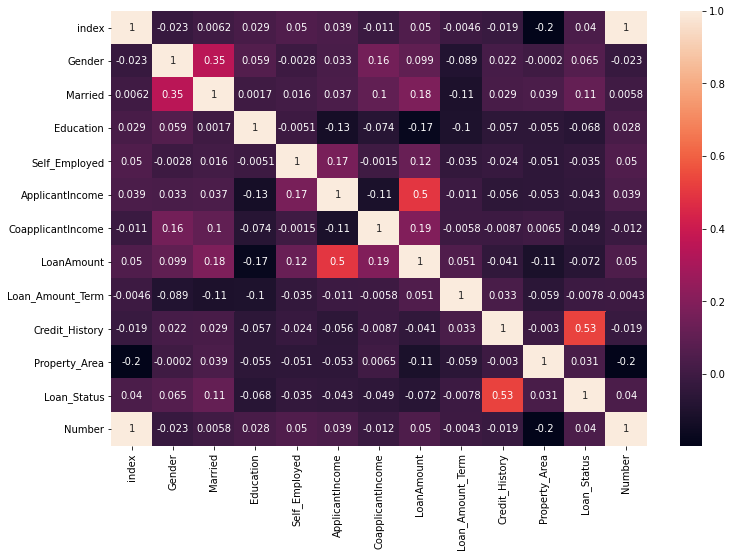

In [45]:
plt.figure(figsize = (12,8))
sns.heatmap(data.corr(),annot=True)
#fig size

In [30]:
data.head()

index   Loan_ID  Gender  Married Dependents  Education  Self_Employed  \
0      1  LP001003       1        1          1          0              0   
1      2  LP001005       1        1          0          0              1   
2      3  LP001006       1        1          0          1              0   
3      4  LP001008       1        0          0          0              0   
4      5  LP001011       1        1          2          0              1   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             4583             1508.0       128.0             360.0   
1             3000                0.0        66.0             360.0   
2             2583             2358.0       120.0             360.0   
3             6000                0.0       141.0             360.0   
4             5417             4196.0       267.0             360.0   

   Credit_History  Property_Area  Loan_Status  Number  
0             1.0              0            0       1  
1             1.0              2            1       2  
2             1.0              2            1       3  
3             1.0              2            1       4  
4             1.0              2            1       5

### selecting the features that have good correlation with the target variable

In [31]:
data_new=data[['Gender','ApplicantIncome','LoanAmount','Credit_History','Loan_Status','Number']]
data_new

Gender  ApplicantIncome  LoanAmount  Credit_History  Loan_Status  Number
0         1             4583       128.0             1.0            0       1
1         1             3000        66.0             1.0            1       2
2         1             2583       120.0             1.0            1       3
3         1             6000       141.0             1.0            1       4
4         1             5417       267.0             1.0            1       5
..      ...              ...         ...             ...          ...     ...
475       0             2900        71.0             1.0            1     476
476       1             4106        40.0             1.0            1     477
477       1             8072       253.0             1.0            1     478
478       1             7583       187.0             1.0            1     479
479       0             4583       133.0             0.0            0     480

[480 rows x 6 columns]

### Splitting into test and train data
### Creating a new data frame for which loan approval has to be calculated

In [32]:
trainData, validData = train_test_split(data_new, test_size=0.4, random_state=26)
print(trainData.shape, validData.shape)
newLoan = pd.DataFrame([{'Gender':1,'ApplicantIncome':6548,'LoanAmount':600, 'Credit_History':1.0,
                             }])
newLoan

(288, 6) (192, 6)


Gender  ApplicantIncome  LoanAmount  Credit_History
0       1             6548         600             1.0

### Creating plot for loan approved or not with Applicant's income and Loan amount

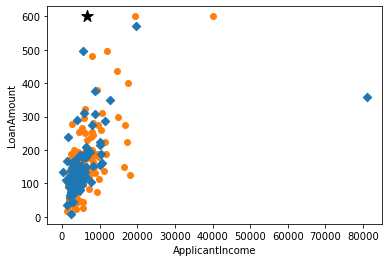

In [33]:
fig, ax = plt.subplots()

subset = trainData.loc[trainData['Loan_Status']==1]
ax.scatter(subset.ApplicantIncome, subset.LoanAmount, marker='o', label='Approved', color='C1')

subset = trainData.loc[trainData['Loan_Status']==0]
ax.scatter(subset.ApplicantIncome, subset.LoanAmount, marker='D', label='Not Approved', color='C0')

ax.scatter(newLoan.ApplicantIncome, newLoan.LoanAmount, marker='*', label='New household', color='black', s=150)

plt.xlabel('ApplicantIncome')  # set x-axis label
plt.ylabel('LoanAmount') # set y-axis label

plt.show()

### Applying Standard Scalar

In [38]:
scaler = preprocessing.StandardScaler()
scaler.fit(trainData[['Gender','ApplicantIncome','LoanAmount','Credit_History']])  # Note the use of an array of column names

# Transform the full dataset
dataNorm = pd.concat([pd.DataFrame(scaler.transform(data_new[['Gender','ApplicantIncome','LoanAmount','Credit_History']]), 
                                    columns=['zGender','zApplicantIncome','zLoanAmount','zCredit_History']),
                       data_new[['Loan_Status']]], axis=1)
trainNorm = dataNorm.iloc[trainData.index]
validNorm = dataNorm.iloc[validData.index]
newHouseholdNorm = pd.DataFrame(scaler.transform(newLoan), columns=['zGender','zApplicantIncome','zLoanAmount','zCredit_History'])

### KNN classification

In [39]:
knn = NearestNeighbors(n_neighbors=3)
knn.fit(trainNorm[['zGender','zApplicantIncome','zLoanAmount','zCredit_History']])
distances, indices = knn.kneighbors(newLoan)
print(trainNorm.iloc[indices[0], :])  # indices is a list of lists, we are only interested in the first element

      zGender  zApplicantIncome  zLoanAmount  zCredit_History  Loan_Status
319  0.485851         12.853515     2.359705        -2.526780            0
120  0.485851          5.886522     5.032601        -2.526780            1
286  0.485851          2.442363     4.698489         0.395761            0


### Finding the k value

In [40]:
train_X = trainNorm[['zGender','zApplicantIncome','zLoanAmount','zCredit_History']]
train_y = trainNorm['Loan_Status']
valid_X = validNorm[['zGender','zApplicantIncome','zLoanAmount','zCredit_History']]
valid_y = validNorm['Loan_Status']

# Train a classifier for different values of k
results = []
for k in range(1, 15):
    knn = KNeighborsClassifier(n_neighbors=k).fit(train_X, train_y)
    results.append({
        'k': k,
        'accuracy': accuracy_score(valid_y, knn.predict(valid_X))
    })

# Convert results to a pandas data frame
results = pd.DataFrame(results)
print(results)

     k  accuracy
0    1  0.734375
1    2  0.703125
2    3  0.734375
3    4  0.723958
4    5  0.765625
5    6  0.755208
6    7  0.776042
7    8  0.770833
8    9  0.796875
9   10  0.786458
10  11  0.796875
11  12  0.786458
12  13  0.796875
13  14  0.802083


#### From above we can say that when K value is 9, the accuracy is more.

### K=9

In [44]:
data_X = dataNorm[['zGender','zApplicantIncome','zLoanAmount','zCredit_History']]
data_y = dataNorm['Loan_Status']
knn = KNeighborsClassifier(n_neighbors=9).fit(train_X, train_y)
distances, indices = knn.kneighbors(newHouseholdNorm)
print(knn.predict(newLoan))
print('Distances',distances)
print('Indices', indices)
print(dataNorm.iloc[indices[0], :])

[1]
Distances [[1.35745571 2.2647     2.28038262 2.4951161  2.9025265  2.94486322
  2.99294738 3.0746395  3.15269265]]
Indices [[163  78  51 193 144 183 145 104 174]]
      zGender  zApplicantIncome  zLoanAmount  zCredit_History  Loan_Status
163  0.485851         -0.329413    -0.235232         0.395761            0
78   0.485851         -0.198573    -0.368877         0.395761            1
51   0.485851          0.062768     1.223724         0.395761            0
193  0.485851         -0.420492    -0.279780         0.395761            1
144  0.485851          5.741748    -0.313191         0.395761            1
183 -2.058243         -0.262464    -0.402288         0.395761            1
145  0.485851         -0.540117    -0.914593        -2.526780            0
104  0.485851         -0.196534    -0.212958         0.395761            0
174  0.485851         -0.405368    -0.045902         0.395761            1


### From above we can see that the prediction for the new loan data is 1 which is, Loan is approved